In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving imdb_labelled.txt to imdb_labelled.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yelp_labelled.txt to yelp_labelled.txt


In [ ]:
filepath_dict = {'yelp': '/content/yelp_labelled.txt',
 'amazon': '/content/amazon_cells_labelled.txt',
 'imdb': '/content/imdb_labelled.txt'}


In [ ]:
df_list = []
for source, path in filepath_dict.items():
 df = pd.read_csv(path, names=['sentence', 'label'], sep='\t')
 df['source'] = source
 df_list.append(df)
df = pd.concat(df_list) 

In [ ]:
df_yelp = df
sentences = df_yelp['sentence']
y = df_yelp['label']
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.05, 
random_state=1000)


In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index)+1

In [ ]:
maxlen = 200
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
embedding_dim = 20
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
 acc = history.history['accuracy']
 val_acc = history.history['val_accuracy']
 loss = history.history['loss']
 val_loss = history.history['val_loss']
 x = range(1, len(acc) + 1)
 plt.figure(figsize=(12, 5))
 plt.subplot(1, 2, 1)
 plt.plot(x, acc, 'b', label='Training acc')
 plt.plot(x, val_acc, 'r', label='Validation acc')
 plt.title('Training and validation accuracy')
 plt.legend()
 plt.subplot(1, 2, 2)
 plt.plot(x, loss, 'b', label='Training loss')
 plt.plot(x, val_loss, 'r', label='Validation loss')
 plt.title('Training and validation loss')
 plt.legend()

Epoch 1/30
261/261 [==============================] - 2s 10ms/step - loss: 3.4100e-09 - accuracy: 1.0000 - val_loss: 1.5953 - val_accuracy: 0.8333
Epoch 2/30
261/261 [==============================] - 2s 10ms/step - loss: 3.2696e-09 - accuracy: 1.0000 - val_loss: 1.5945 - val_accuracy: 0.8333
Epoch 3/30
261/261 [==============================] - 2s 9ms/step - loss: 3.1528e-09 - accuracy: 1.0000 - val_loss: 1.5994 - val_accuracy: 0.8333
Epoch 4/30
261/261 [==============================] - 2s 9ms/step - loss: 3.0614e-09 - accuracy: 1.0000 - val_loss: 1.6088 - val_accuracy: 0.8333
Epoch 5/30
261/261 [==============================] - 2s 9ms/step - loss: 2.9892e-09 - accuracy: 1.0000 - val_loss: 1.6078 - val_accuracy: 0.8333
Epoch 6/30
261/261 [==============================] - 2s 9ms/step - loss: 2.8592e-09 - accuracy: 1.0000 - val_loss: 1.6120 - val_accuracy: 0.8333
Epoch 7/30
261/261 [==============================] - 2s 9ms/step - loss: 2.7803e-09 - accuracy: 1.0000 - val_loss: 1.6208

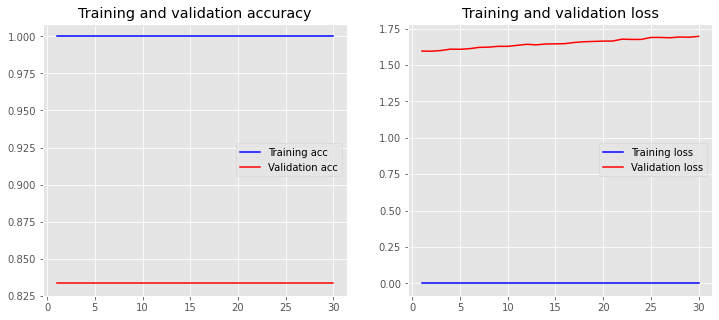

In [ ]:
history = model.fit(X_train, y_train,epochs=30,verbose=True,validation_data=(X_test, 
y_test),batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: ",accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: ",accuracy)
plot_history(history)


In [ ]:
my_test = ["That boy is really stupid","he is good person","the food here is cold and not at all edible"]
my_test_token= tokenizer.texts_to_sequences(my_test)
my_test_padded=pad_sequences(my_test_token, padding='post', maxlen=maxlen)
z=model.predict(my_test_padded)
for i,j in zip(my_test,z):
 print(i)
if j>=0.7:
 print(j,"Positive",sep=" : ")
else:
 print(j,"Negative",sep=" : ")
model_json = model.to_json()
with open("mahima.json", "w") as json_file:
 json_file.write(model_json)
model.save_weights("mahima.h5")

That boy is really stupid
he is good person
the food here is cold and not at all edible
[1.0069287e-07] : Negative
